<a href="https://colab.research.google.com/github/ka698931/An-old-style-blog-app/blob/main/DMTCREDITCARDPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data looks like:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26

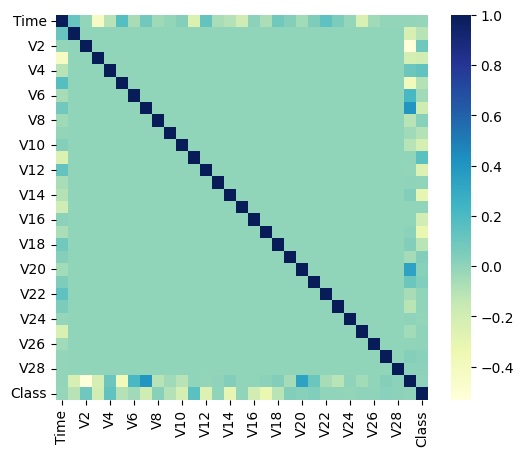

<Figure size 640x480 with 0 Axes>

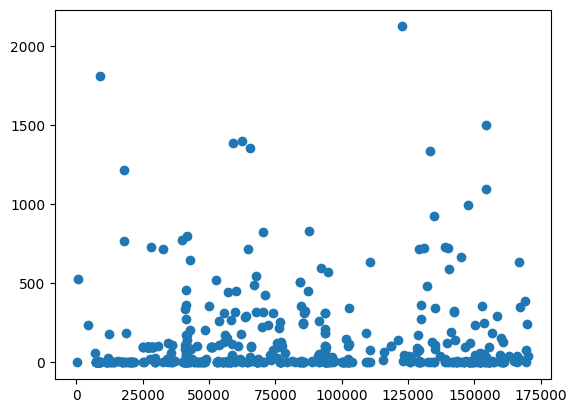

<Figure size 75x50 with 0 Axes>

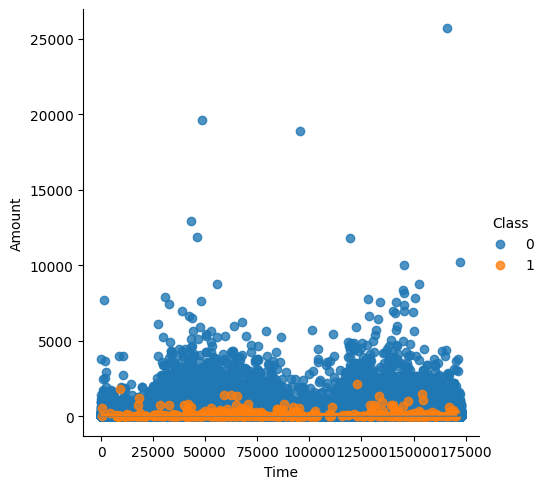

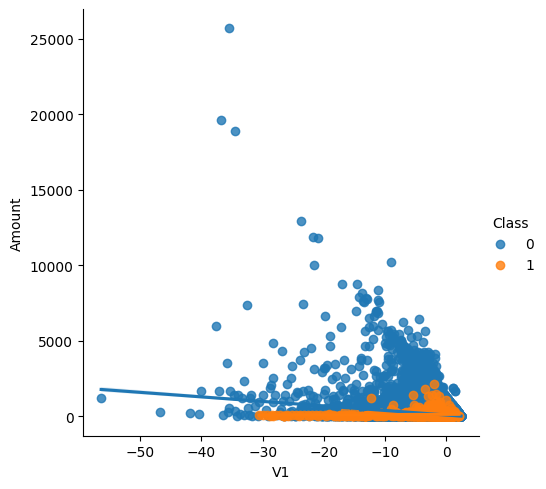

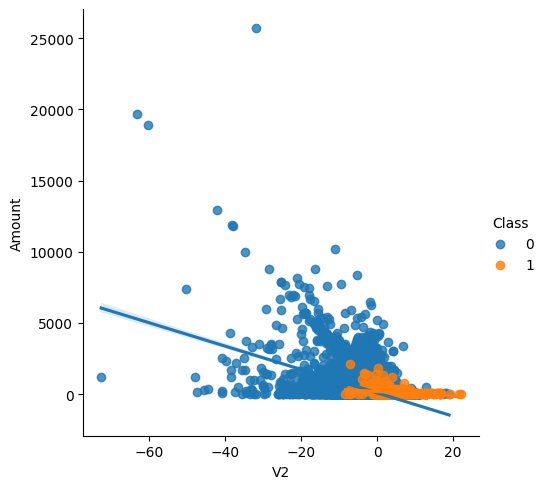

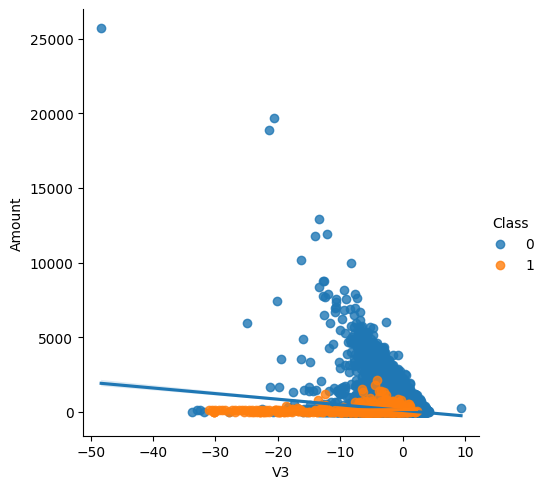

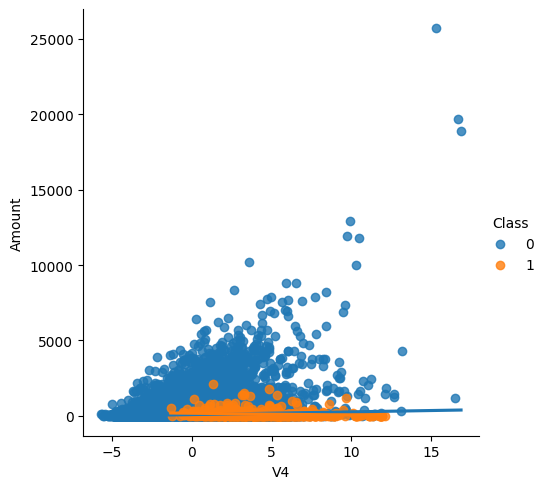

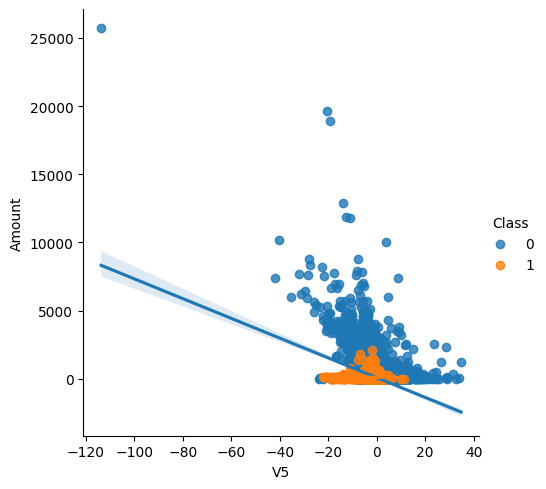

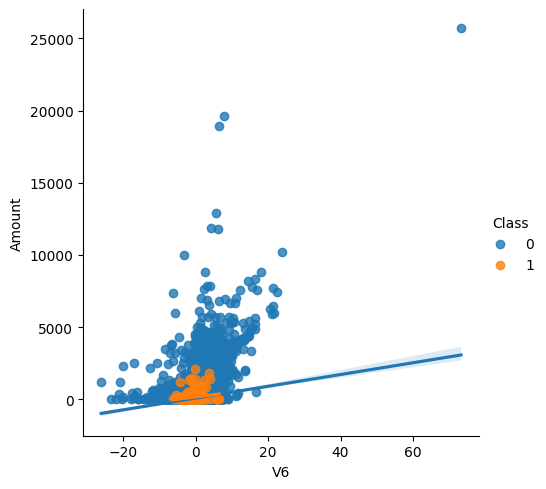

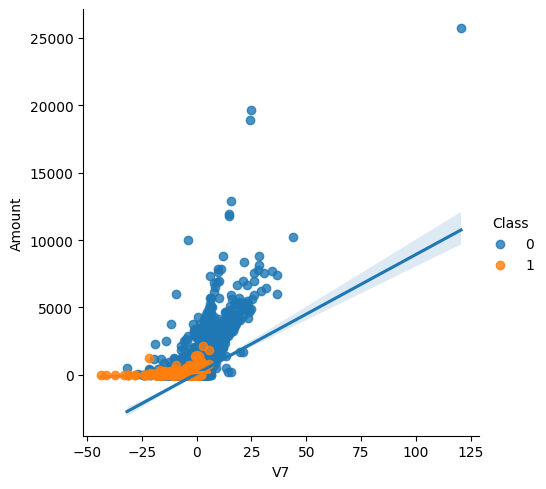

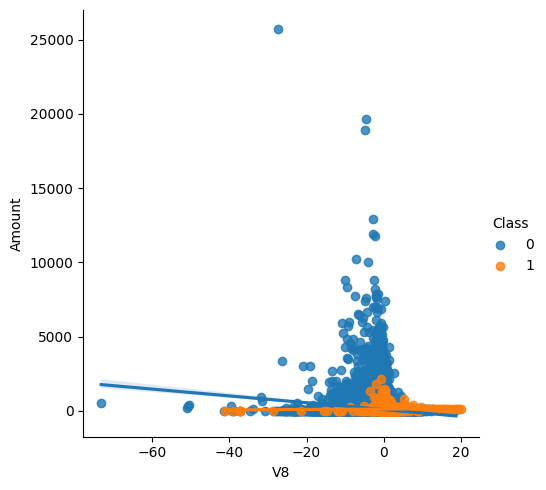

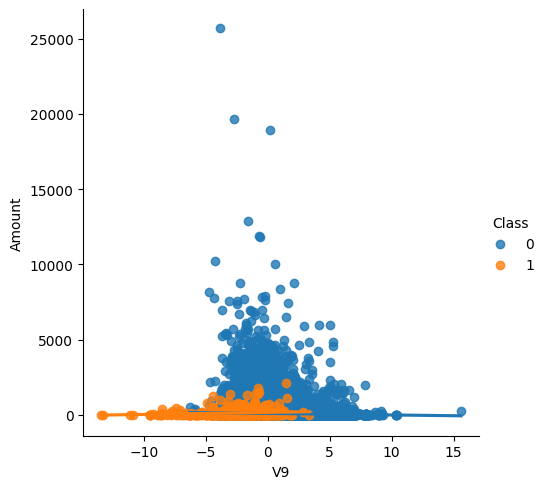

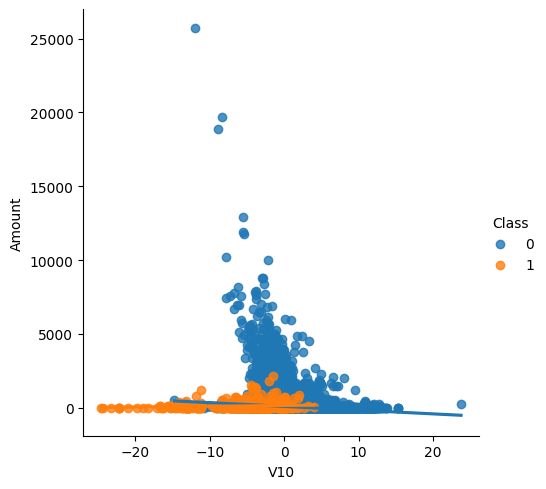

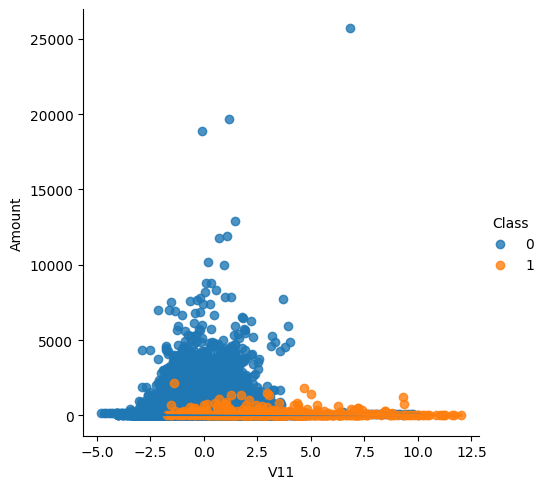

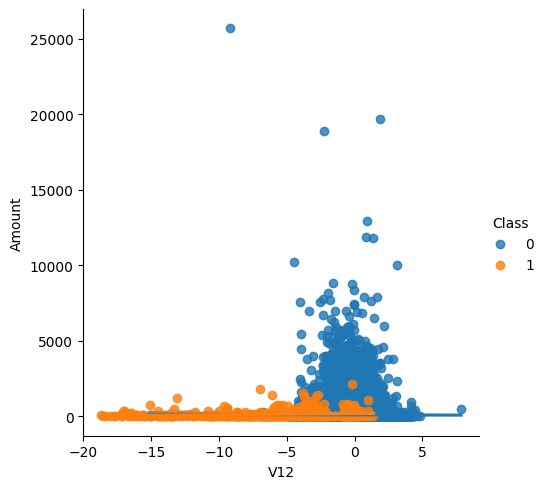

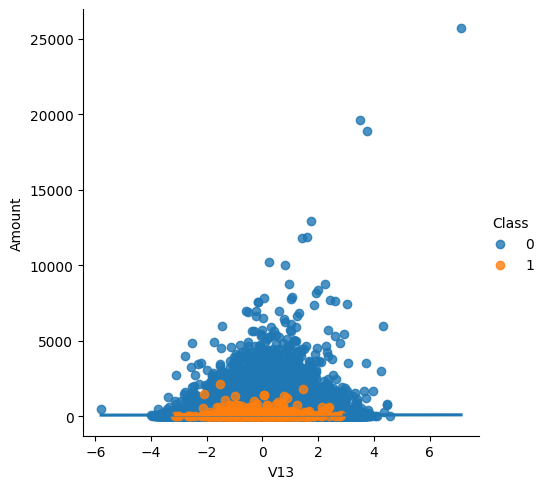

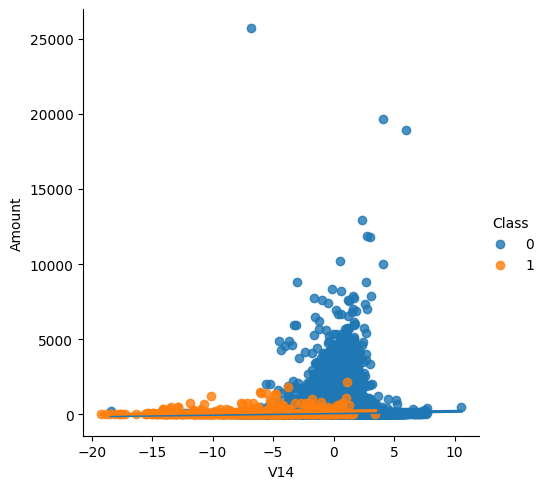

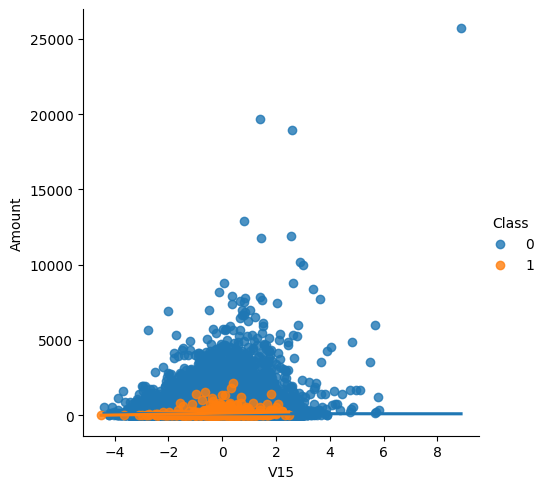

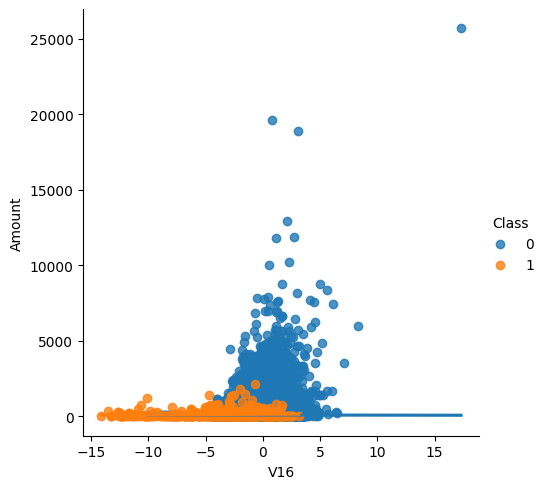

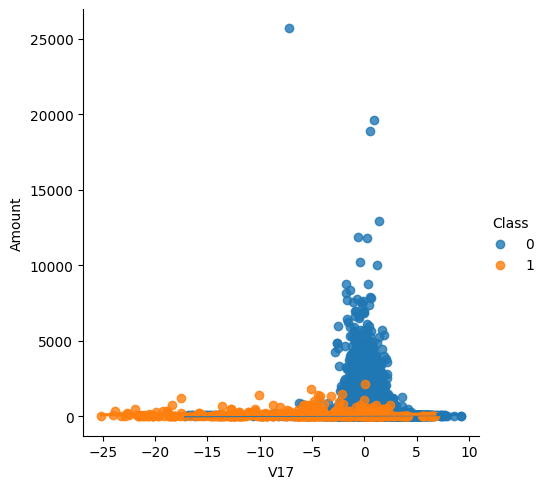

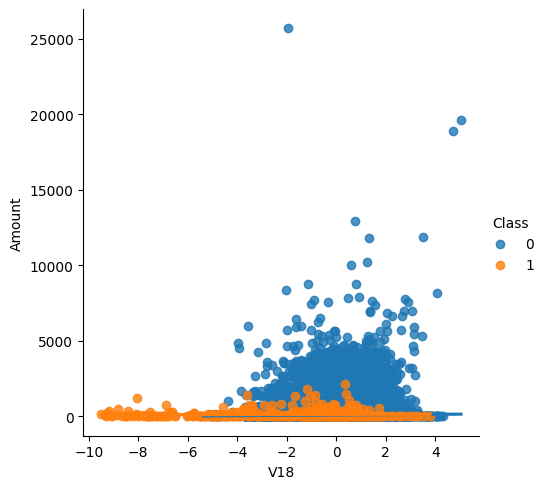

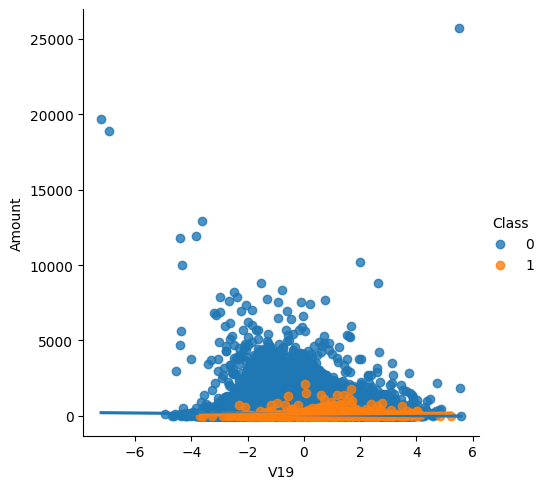

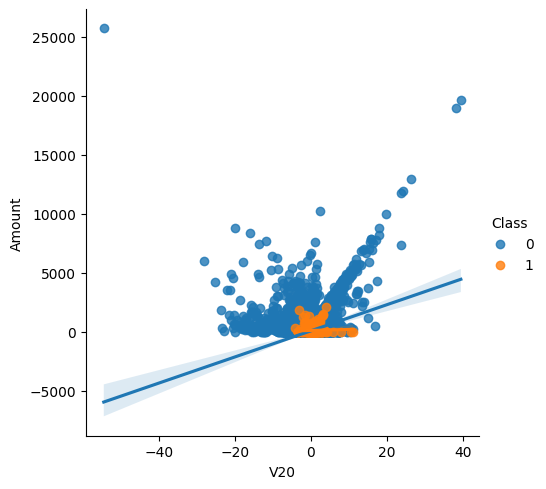

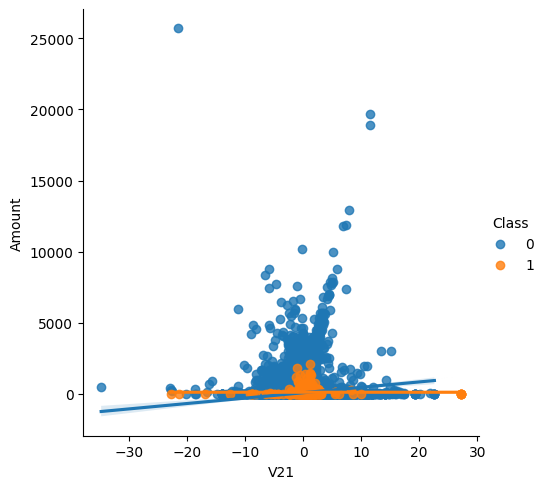

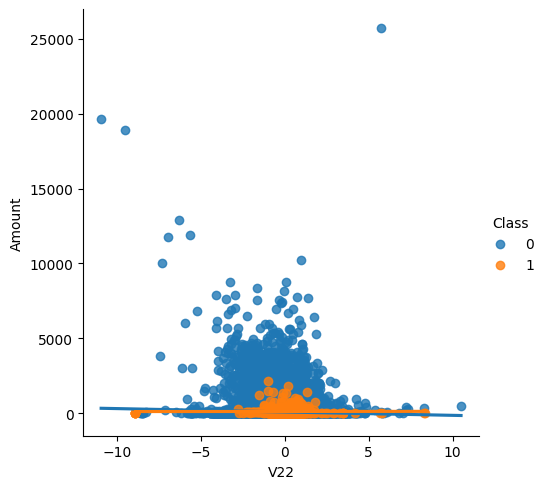

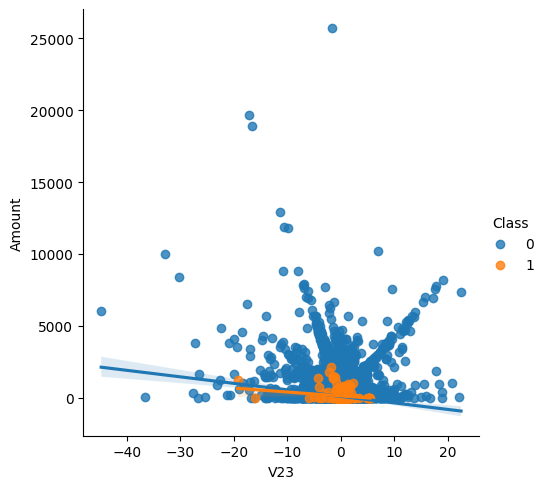

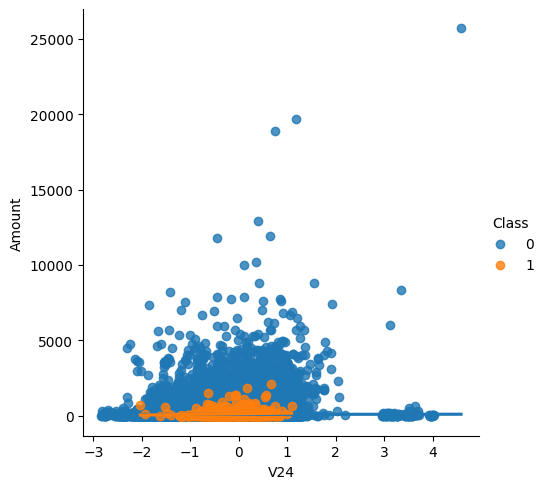

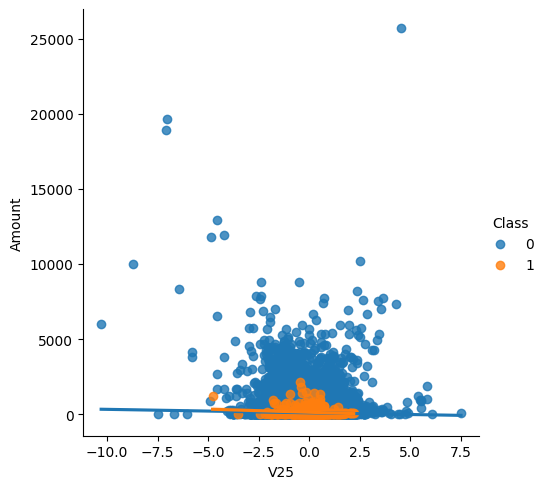

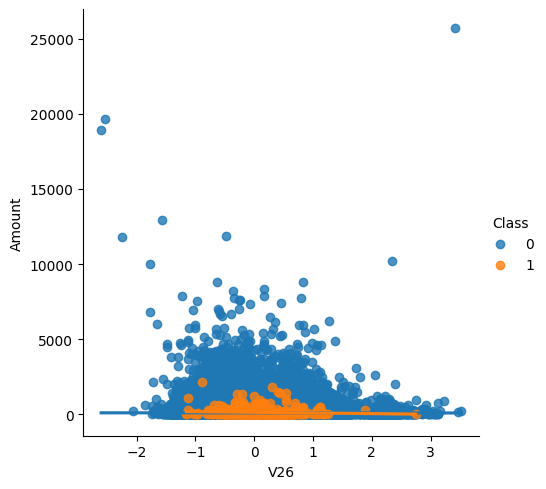

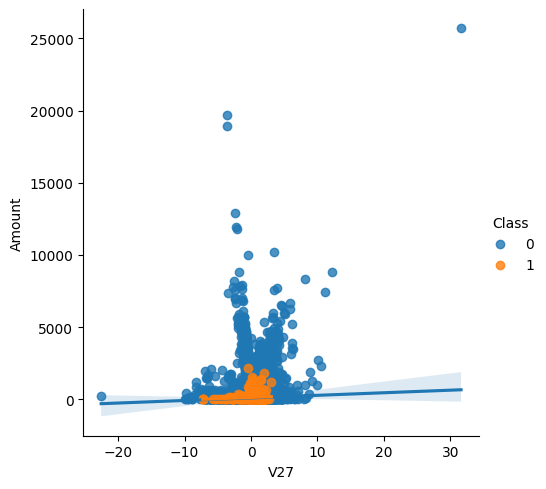

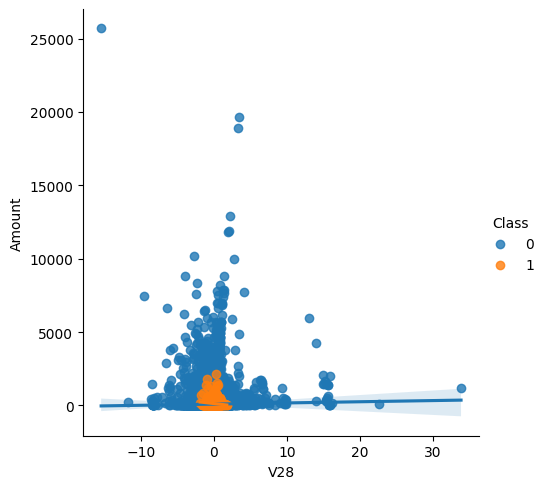

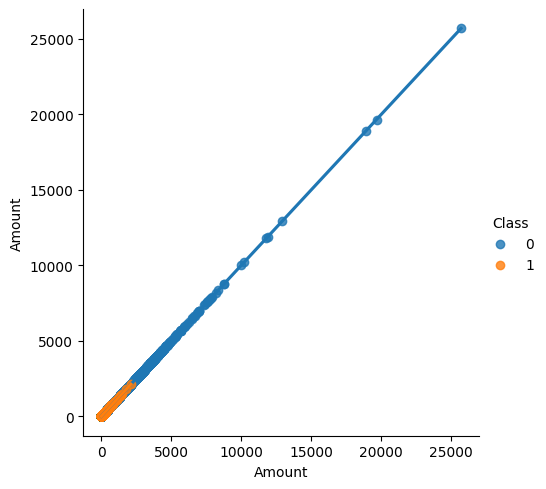

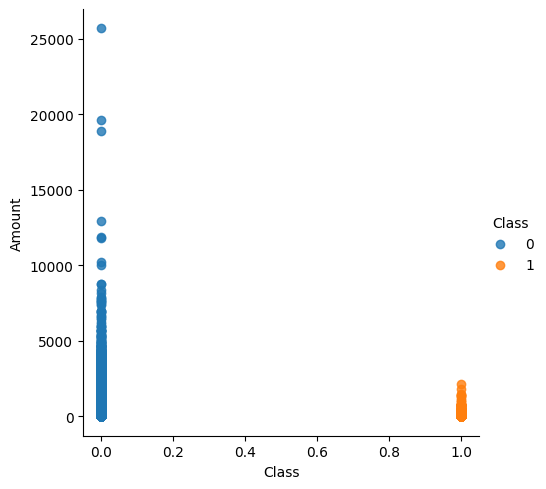

0    284315
1       492
Name: Class, dtype: int64


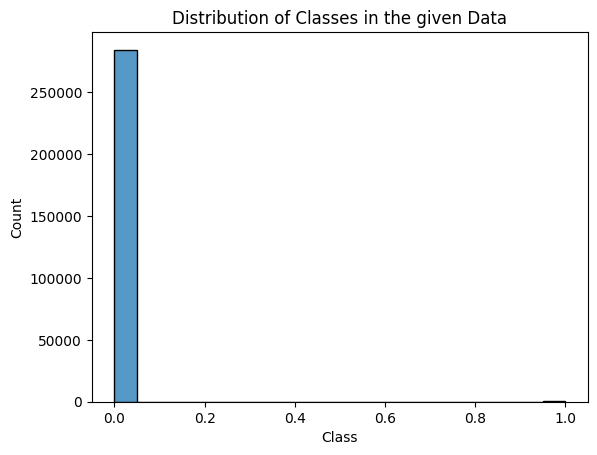

Train Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    227454
           1       0.98      0.96      0.97    227454

    accuracy                           0.97    454908
   macro avg       0.97      0.97      0.97    454908
weighted avg       0.97      0.97      0.97    454908

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.07      0.89      0.13       101

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Test result confusion matrix is :
[[55674  1187]
 [   11    90]]


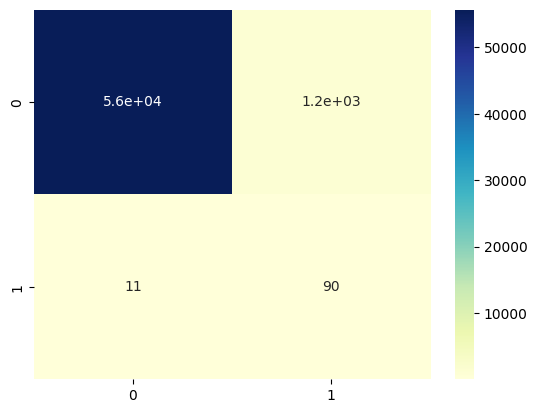

Precision: 0.9998024602675766
Recall: 0.9791245317528711
f1_score_test: 0.9893554635437954
The F1 score is very good hence my project is successful.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
X = pd.read_csv("/creditcard.csv")

# Check the data
print("The data looks like:")
print(X.head())
print(X.columns)
print(X.describe())

# Visualize the correlation heatmap
corrMatrix = X.corr()
sns.heatmap(data=corrMatrix, annot=False, cmap="YlGnBu")
plt.gcf().set_size_inches(6, 5)
plt.figure()
plt.show()

# Plot of frauds with time
plt.scatter(x=X.loc[X['Class']==1]['Time'], y=X.loc[X['Class']==1]['Amount'])
plt.show()
plt.gcf().set_size_inches(0.75, 0.5)

# Plotting regression plots
for col in X.columns:
    sns.lmplot(x=col, y='Amount', hue='Class', data=X)
    plt.show()

# Value counts of class
sns.histplot(X['Class'])
plt.title("Distribution of Classes in the given Data")
print(X['Class'].value_counts())
plt.show()

# Divide X and y
y = X['Class']
X.drop(['Class'], axis=1, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)



# Handling missing values in X_train
X_train.dropna(inplace=True)

# Handling missing values in y_train
y_train.dropna(inplace=True)

# Using SMOTE to handle class imbalance
smote_1 = SMOTE()
X_train_resampled, y_train_resampled = smote_1.fit_resample(X_train, y_train)


# Logistic regression
classifier = LogisticRegression(max_iter=150)
classifier.fit(X_train_resampled, y_train_resampled)

# Model evaluation
pred_train = classifier.predict(X_train_resampled)
report_train = classification_report(y_train_resampled, pred_train)
print("Train Classification Report:")
print(report_train)

pred_test = classifier.predict(X_test)
report_test = classification_report(y_test, pred_test)
print("Test Classification Report:")
print(report_test)

# Confusion matrix for test set
conf_matrix_test = confusion_matrix(y_true=y_test, y_pred=pred_test)
print("Test result confusion matrix is :")
print(conf_matrix_test)
sns.heatmap(data=conf_matrix_test, annot=True, cmap="YlGnBu")
plt.show()

# Model evaluation metrics
precision_test = conf_matrix_test[0][0] / (conf_matrix_test[1][0] + conf_matrix_test[0][0])
print("Precision:", precision_test)

recall_test = conf_matrix_test[0][0] / (conf_matrix_test[0][1] + conf_matrix_test[0][0])
print("Recall:", recall_test)

f1_score_test = (2) / ((1 / precision_test) + (1 / recall_test))
print("f1_score_test:", f1_score_test)

print("The F1 score is very good hence my project is successful.")


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
